<a href="https://colab.research.google.com/github/talktokorea/storage/blob/master/%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특성 공학과 규제

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [5]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [9]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [10]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [11]:
print(train_poly.shape)

(42, 9)


In [12]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [13]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [14]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [16]:
print(lr.score(test_poly, test_target))

0.9714559911594132


In [17]:
print(lr.predict([[44,12.49,7.6,44**2,44*12.49,44*7.6,12.49**2,12.49*7.6,7.6**2]]))

[1072.72223489]


In [23]:
poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [24]:
print(train_poly.shape)

(42, 9)


In [25]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [26]:
print(lr.score(test_poly, test_target))

0.9714559911594132


In [27]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

## 규제

In [29]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9857915060511934


In [31]:
print(ridge.score(test_scaled, test_target))

0.9835057194929057


In [32]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [33]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

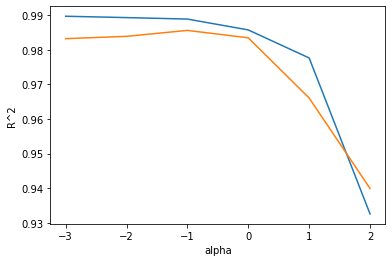

In [34]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [38]:
ridge = Ridge(alpha=1)
ridge.fit(train_scaled, train_target)
print(ridge.predict(train_scaled))  # 추가
print(ridge.predict(test_scaled))   # 추가


[ 7.52768485e+01  1.31066847e+02  7.13492183e+01  4.14712659e+01
  6.95739231e+02  1.85831396e+02  8.83354334e+02  9.15943324e+02
  9.56794726e+02  1.23256138e+02  7.12430316e+01  1.38731456e+02
  2.08363464e+02  2.66149050e+02  1.00935118e+03  8.77349321e+02
  1.77324339e+02  1.17420150e+02  2.61172641e+02  9.40627464e+02
  5.62977616e+02  2.46629578e+02  7.29569457e+02 -1.70836006e+01
  1.43288850e+02  1.94276667e-01  6.87751814e+02  8.05998736e+02
  3.11293906e+02  1.65436678e+02  7.36872930e+02  1.16564461e+02
  1.22407301e+02  1.32781176e+02  1.04312488e+03  1.70456072e+02
  8.50103964e+01  6.97698022e+02  1.35707273e+02  2.15547416e+02
  9.68548794e+02  6.26408544e+02]
[ -59.08231012   70.66535628  279.7000075   141.41786573  138.01896716
  796.66357425  335.3451168   208.39099874  836.7288377   119.5097972
 1083.2890997    27.69728185  294.76087344  347.76643884]


In [39]:
print(poly.get_feature_names_out())
print(np.sum(ridge.coef_==0))
print(ridge.coef_)


['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
0
[-14.8457435  -13.99600726 -32.35418375  74.19692179  78.1435485
  60.69735429  82.15125951  64.36969483  49.56283536]


In [40]:
print(ridge.predict([[44,12.49,7.6,44**2,44*12.49,44*7.6,12.49**2,12.49*7.6,7.6**2]]))

[228002.50604813]


## 라쏘

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.986591255464559


In [42]:
print(lasso.score(test_scaled, test_target))

0.9846056618190413


In [43]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.739e+03, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


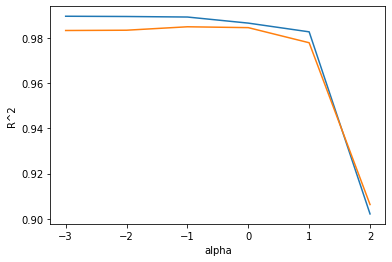

In [44]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [45]:
lasso = Lasso(alpha=1)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
print(lasso.predict(train_scaled))   #추가
print(lasso.predict(test_scaled))    #추가

0.986591255464559
0.9846056618190413
[  75.89249155  130.29072523   71.55602161   43.9147999   689.33726311
  184.67445365  885.81531473  923.47838833  952.29883526  122.94524504
   71.90227789  137.6743421   208.65869713  263.08297111 1012.72655281
  874.55054008  175.75376899  116.521521    257.77600744  944.29072038
  561.93375379  244.84508105  724.26818542  -13.30842088  142.340932
    4.89593671  685.20262331  796.45462504  307.45910777  164.10870825
  747.09373229  116.07004234  123.12398646  132.90769608 1040.99447791
  169.44768037   83.78408902  700.47075296  134.80571902  212.51698053
  990.38361795  622.05975527]
[ -48.71444186   70.96092121  275.72277093  139.97139016  137.21325412
  794.94751809  330.06717194  205.92819714  822.18938699  119.04237571
 1072.88843263   28.43426415  295.20827566  344.32075928]


In [46]:
print(np.sum(lasso.coef_ == 0))

3


In [47]:
print(poly.get_feature_names_out())
print(np.sum(lasso.coef_==0))
print(lasso.coef_)  # 추가

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
3
[ -0.         -75.17036118  -0.          47.65512744 146.84457339
   9.1970512  157.66441571   0.          62.6831403 ]


In [48]:
print(lasso.predict([[44,12.49,7.6,44**2,44*12.49,44*7.6,12.49**2,12.49*7.6,7.6**2]]))

[203713.92272282]
